#Univariate Data with the Normal Inverse Chi-Square Distribution

---
One of the simplest examples of data is univariate data

Let's consider a timeseries example:

[The Annual Canadian Lynx Trappings Dataset](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/lynx.html) as described by [Campbel and Walker 1977](http://www.jstor.org/stable/2345277) contains the number of Lynx trapped near the McKenzie River in the Northwest Territories in Canada between 1821 and 1934.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_context('talk')
sns.set_style('darkgrid')

In [2]:
lynx = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/lynx.csv',
                   index_col=0)

In [3]:
lynx = lynx.set_index('time')
lynx.head()

,lynx
time,
1821,269
1822,321
1823,585
1824,871
1825,1475


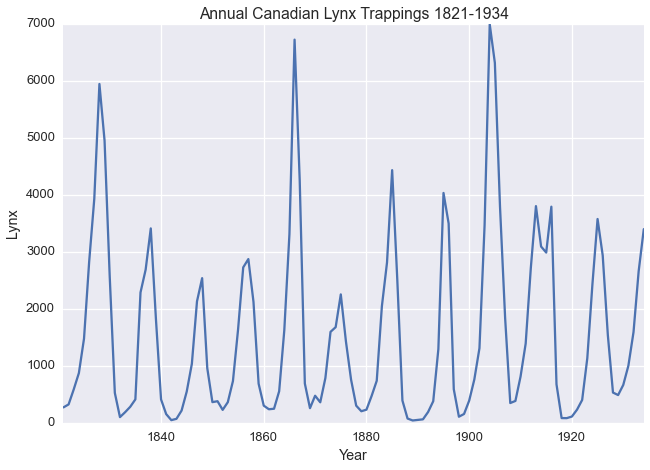

In [4]:
lynx.plot(legend=False)
plt.xlabel('Year')
plt.title('Annual Canadian Lynx Trappings 1821-1934')
plt.ylabel('Lynx')

Let's plot the kernel density estimate of annual lynx trapping

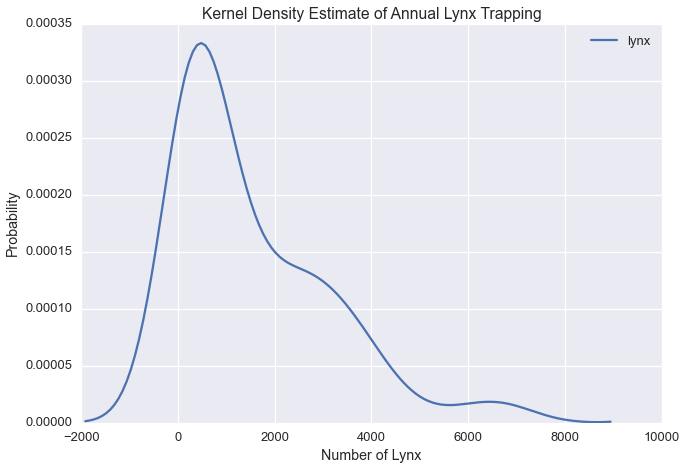

In [5]:
sns.kdeplot(lynx['lynx'])
plt.title('Kernel Density Estimate of Annual Lynx Trapping')
plt.ylabel('Probability')
plt.xlabel('Number of Lynx')

Our plot suggests there could be three modes in the Lynx data.

In modeling this timeseries, we could assume that the number of lynx trapped in a given year is falls into one of $k$ states, which are normally distributed with some unknown mean $\mu_i$ and variance $\sigma^2_i$ for each state

In the case of our Lynx data

$$\forall i \in [1,...,k] \hspace{2mm} p(\text{lynx trapped}| \text{state} = i) \sim \mathcal{N}(\mu_i, \sigma^2_i)$$

---


Now let's consider demographics data from the Titanic Dataset

The Titanic Dataset contains information about passengers of the Titanic.


In [6]:
ti = sns.load_dataset('titanic')
ti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Passenger age and fare are both real valued.  Are they related?  Let's examine the correlation matrix

In [7]:
ti[['age','fare']].dropna().corr()

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


Since the correlation is between the two variables is zero, we can model these two real valued columns independently.  

Let's plot the kernel density estimate of each variable

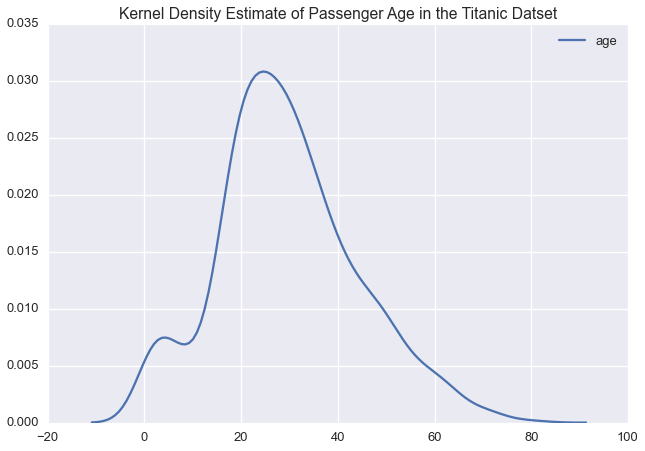

In [8]:
sns.kdeplot(ti['age'])
plt.title('Kernel Density Estimate of Passenger Age in the Titanic Datset')

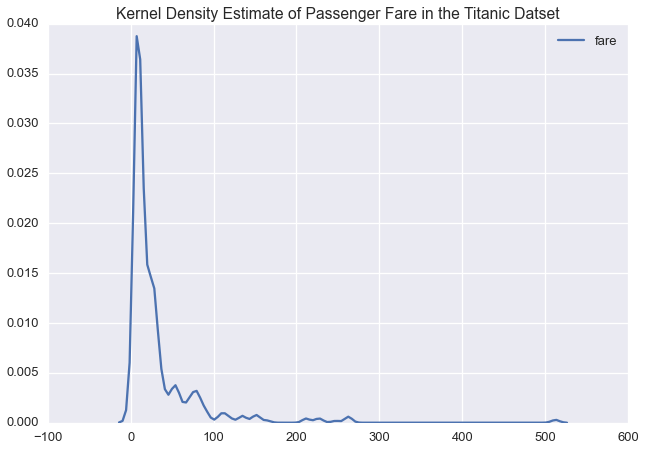

In [9]:
sns.kdeplot(ti['fare'])
plt.title('Kernel Density Estimate of Passenger Fare in the Titanic Datset')

Given the long tail in the fare price, we might want to model this variable on a log scale:

In [10]:
ti['logfare'] = np.log(ti['fare'])
ti[['age','logfare']].dropna().corr()

,age,logfare
age,1.000000,0.135352
logfare,0.135352,1.000000


Again, `logfare` and `age` have near zero correlation, so we can again model these two variables independently

Let's see what a kernel density estimate of log fare would look like

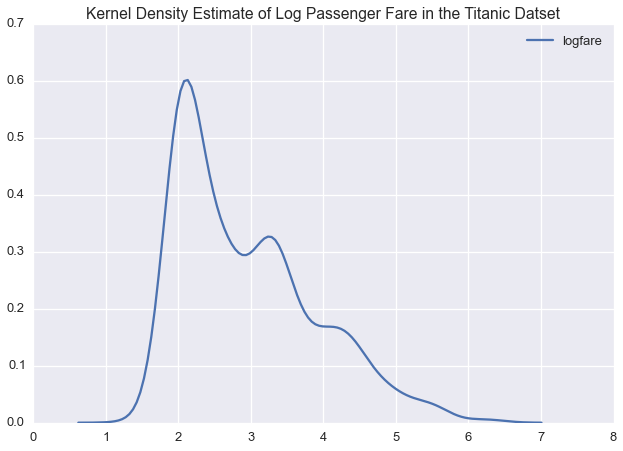

In [11]:
sns.kdeplot(ti['logfare'])
plt.title('Kernel Density Estimate of Log Passenger Fare in the Titanic Datset')

In logspace, passenger fare is multimodal, suggesting that we could model this variable with a normal distirbution

If we were to model the passenger list using our Mixture Model, we would have separate likelihoods for `logfare` and `age`


$$\forall i \in [1,...,k] \hspace{2mm} p(\text{logfare}|\text{cluster}=i)=\mathcal{N}(\mu_{i,l}, \sigma^2_{i,l})$$


$$\forall i \in [1,...,k] \hspace{2mm}  p(\text{age}|\text{cluster}=c)=\mathcal{N}(\mu_{i,a}, \sigma^2_{i,a})$$

---

Often, real value data is assumed to be normally distributed.  

To learn the latent variables, $\mu_i$ $\sigma^2_i$, we would use a normal inverse-chi-square likelihood

The normal inverse-chi-square likelihood is the conjugate univariate normal likelihood in data microscopes.  We also have normal likelihood, the normal inverse-wishart likelihood, optimized for multivariate datasets. 


It is important to model univariate normal data with this likelihood as it acheives superior performance on univariate data.

In both these examples, we found variables that were amenable to being modeled as univariate normal:

1. Univariate datasets
2. Datasets containing real valued variables with near zero correlation

To import our univariate normal inverse-chi-squared likelihood, call:

In [12]:
from microscopes.models import nich as normal_inverse_chisquared